# What is the Best Neighborhood to be a Plant?

https://data.wprdc.org/dataset/particulate-matter-2-5/resource/d281efe0-62d9-4c2b-b41f-bb99fcbec705

# Introduction

The metric I used is the average concentration of particulate matter 2.5 in the air. I decided to use this metric because it measures the amount of PM 2.5 in the air which is basically tiny particles that include things that are bad for plants. So an area with less measured concentration of PM 2.5 is better for being a plants. First I showed a table that shows the average value, but its hard to understand, so I plotted this data on the same map as various Pittsburgh neightborhoods (map also from WPDRC). The lighter the area the less concertration of PM 2.5 and the better the quality of air for the plants.



In [6]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods_.shp")
particulate = geopandas.read_file("ParticulateMatter2.5.shp")
# read in the shapefiles

# import dataset
pmSet = pd.read_csv("PM2.csv")


query_mask1 = pmSet['PM25'] < 13 
query_mask2 = pmSet['PM25'] > 0
newpm = pmSet[query_mask1 & query_mask2]
newpm=newpm.loc[:,['CensusTract',"PM25"]]
newpm.head(100)





,CensusTract,PM25
0,10300,12.264655
1,20100,12.283052
2,20300,12.241216
3,30500,12.234197
4,40200,12.315312
...,...,...
95,270400,12.215499
96,270800,12.192786
97,271500,12.205422
98,281400,12.240499


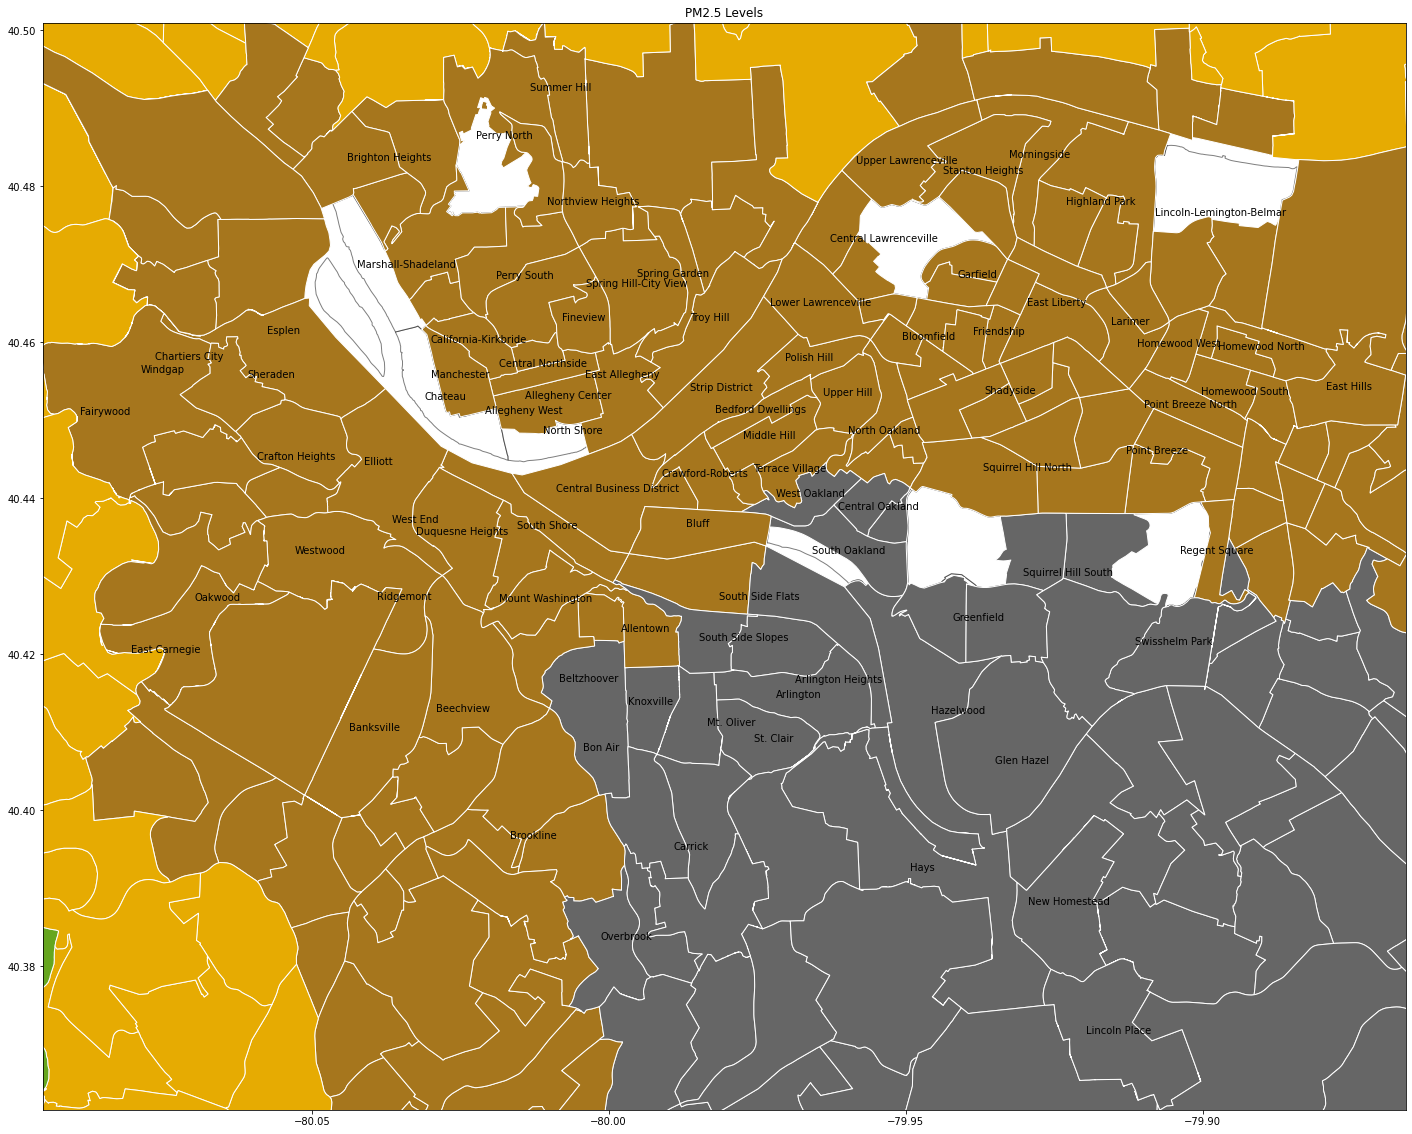

In [7]:
map = particulate.merge(newpm)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 



for data in neighborhoodMap.groupby('hood'):
    color = 'white'
nmap = neighborhoodMap.plot(ax = ax, color = color, edgecolor = 'black', alpha = 0.5)
map.plot(column = 'PM25', cmap = 'Dark2', edgecolor = 'white', ax = ax)
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])

ax.set(title = "PM2.5 Levels")
plt.show()

## The Best Neighborhood and Conclusion

The lighter the color the better the neighborhood for plants based on concentration of PM 2.5.

#### Top 5
* New Homestead
* Arlington Heights
* BeechView
* Central Lawrencville
* Perr North

#### Worst 3
* Greenfield
* Knoxville
* Hazel Wood

We have the best and worst neighborhoods. These areas based off concetration of PM 2.5 are the best. I assumed the concentration would be the worst near downtown which was the case suprisingly. The more south you sent the worst minus a few areas. 